# Plotting Spectogram in python

In [35]:
import numpy 
import scipy.io.wavfile as wavfile
from scipy.fftpack import dct
import matplotlib.pyplot as plt
from scipy import signal as sig
import python_speech_features as psf
from matplotlib import cm
import os
from IPython.display import Image


Converting the available .aif file to .wav file. The code fragment uses FFMPEG for converting the files. FFMPEG can be easily dowloaded using the follwing link https://www.ffmpeg.org/download.html

In [44]:
def process(f):
    infile= f
    outfile= f[:-3]+"wav"
    cmd= "ffmpeg -i {} {}".format(infile, outfile)
    os.popen(cmd)

process("20090329_151500_55297s5ms_TRAIN16521_1.aif")

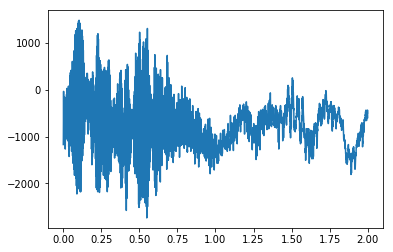

In [36]:
sample_rate, signal = wavfile.read('20090329_151500_55297s5ms_TRAIN16521_1.wav')  # File assumed to be in the same directory
signal = signal[0:int(2 * sample_rate)]


Time=numpy.linspace(0, len(signal)/sample_rate, num=len(signal))

plt.plot(Time,signal)
plt.show()


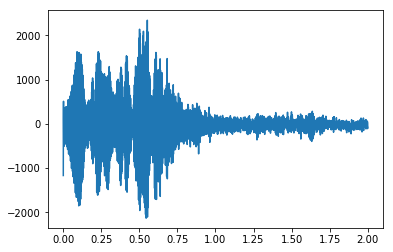

In [37]:
pre_emphasis=0.97
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

plt.plot(Time,emphasized_signal)
plt.show()

Following code fragment uses Spectrogram function available in matplotlib 

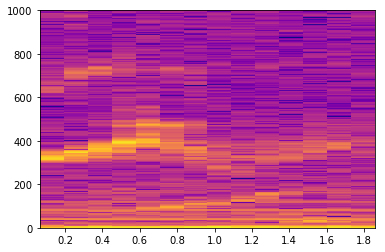

In [38]:

def graph_spectrogram(wav_file):
    rate, data = get_wav_info(wav_file)
    nfft = 512# Length of the windowing segments
    fs = rate  # Sampling frequency
    pxx, freqs, bins, im = plt.specgram(data, nfft,fs,noverlap=256, cmap="plasma")
    
    plt.axis('on')
   
    plt.savefig('sp_xyz.png',
                dpi=100, # Dots per inch
                frameon='false',
                aspect='normal',
                bbox_inches='tight',
                pad_inches=0) # Spectrogram saved as a .png 
    
    plt.show()

def get_wav_info(wav_file):
    rate, data = wavfile.read(wav_file)
    return rate, data


wav_file = '20090329_151500_55297s5ms_TRAIN16521_1.wav' # Filename of the wav file
graph_spectrogram(wav_file)
    
    

Following code segment is used for converting all the wav files present in  folder to a spectrogram by using pre emphasis, hamming window and NFFT, pre - emphasis value can be 0.95-0.97 and color map choosen is Seismic, however colormap can have a significant effect on visualising information available in the wave file 

In [41]:
count=0
files= os.listdir("./")
for f in files:    
     if f.lower()[-3:]=="wav":
        sample_rate, signal = wavfile.read(f)  # File assumed to be in the same directory
        print(len(signal))
        signal = signal[0:int(2 * sample_rate)]
        print("processing ",f)
          

        Time=numpy.linspace(0, len(signal)/sample_rate, num=len(signal))

        pre_emphasis=0.97
        signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
        frame_size=0.025
        frame_stride=0.01
        frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
        signal_length = len(signal)#earlier pre emphasis
        frame_length = int(round(frame_length))
        frame_step = int(round(frame_step))
        num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

        pad_signal_length = num_frames * frame_step + frame_length


        z = numpy.zeros((pad_signal_length - signal_length))
        pad_signal = numpy.append(signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

        indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
        frames = pad_signal[indices.astype(numpy.int32, copy=False)]

        #hammong window
        frames *= numpy.hamming(frame_length)

        NFFT=512
        mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
        mag_frames=mag_frames.transpose()
        pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum


        fig = plt.figure(frameon=False)
        fig.set_size_inches(1,1)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        plt.imshow(mag_frames, interpolation='nearest', cmap=cm.seismic, origin='lower', aspect='auto')
        fig.savefig(f[:-3]+"png", dpi=512)
        count=count+1
          
     
print("converted files :",count)

        

4000
processing  20090329_151500_55252s7ms_TRAIN16505_1.wav
4000
processing  20090329_151500_55276s9ms_TRAIN16512_0.wav
4000
processing  20090329_151500_55297s5ms_TRAIN16521_1.wav
3729
processing  20090329_151500_55306s9ms_TRAIN16524_0.wav
4000
processing  20090329_151500_55310s6ms_TRAIN16526_1.wav
4000
processing  20090329_151500_55319s1ms_TRAIN16528_1.wav
4000
processing  20090329_151500_55345s8ms_TRAIN16536_1.wav
4000
processing  20090329_151500_55373s7ms_TRAIN16542_1.wav
converted files : 8


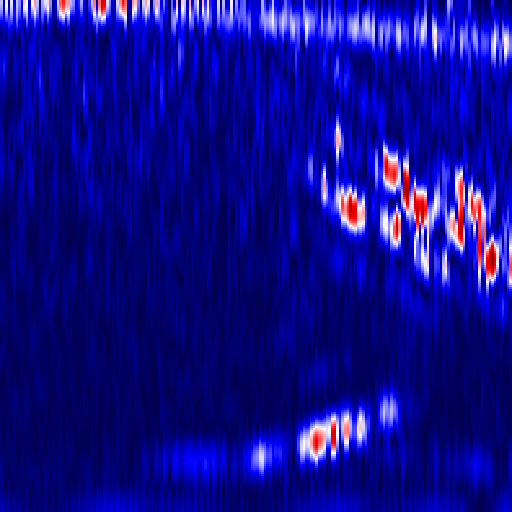

In [42]:
Image("20090329_151500_55252s7ms_TRAIN16505_1.png")